## Comprehensive Data Exploration with Python (summary)

- By: [Pedro Marcelino](http://pmarcelino.com) - February 2017
- Kaggle Code: [here](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python)
- **About**: Great starting point

In [488]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler  # To standarize featrues
from scipy import stats                           # To call statistical functions
import warnings                                   # To control warning messages
warnings.filterwarnings('ignore')                 # Ignore warnings
# Makes plot appear inside notebook:
%matplotlib inline

df_train = pd.read_csv('../CSV/train.csv')
df_test  = pd.read_csv('../CSV/test.csv')

### 1. Variable analysis

Excel spreadhseet for variable study. Name: `variable_study.csv`.  
**Column names**:
- Variable **name**: name.
- **Type**: continuos vs. discrete.
- **Segment**: defined as **space**, **building** and **location**.
- **Expectation** (**6th sense**): what we think impacts *SalePrice* (**High**, **Medium** and **Low**).
  - Do we think about this variable?
  - How important is it?
  - Information given by other variable?
- **Conclusion**: what we think after study of data. Same scale as Expectation.
- **Comments**: general info.
Review **High** *Expectation* defined variables and make **scatter plots** with *SalePrice*, filling the *Conclusion* column.

#### 1. Make a CSV file to looks for variables correlations as suggested (`variable_study.csv`)

#### 2. Plot all numerical variables and look for strong correlation

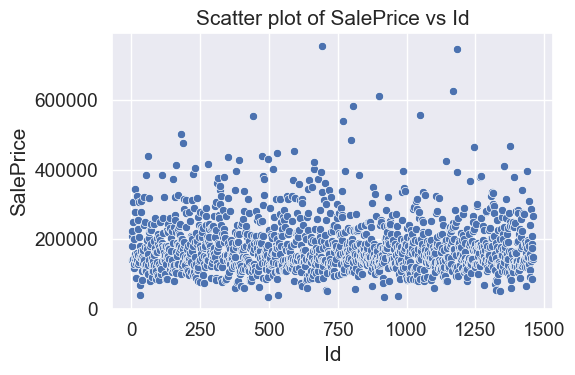

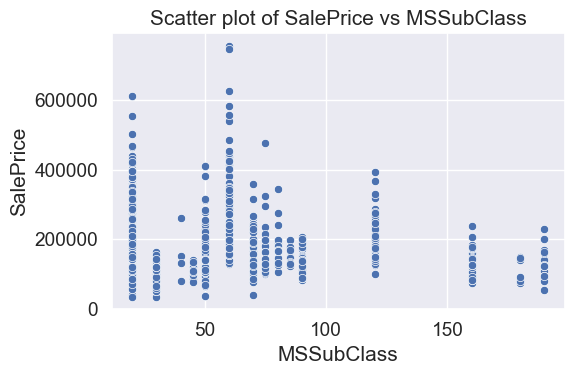

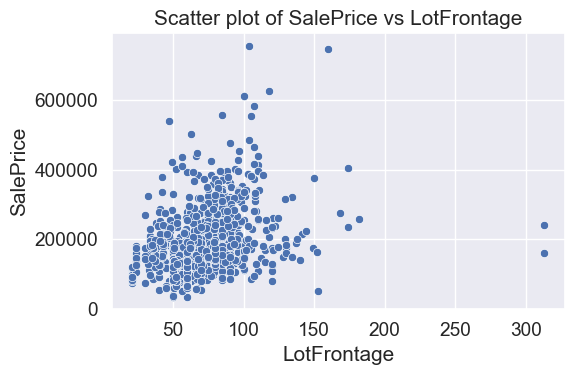

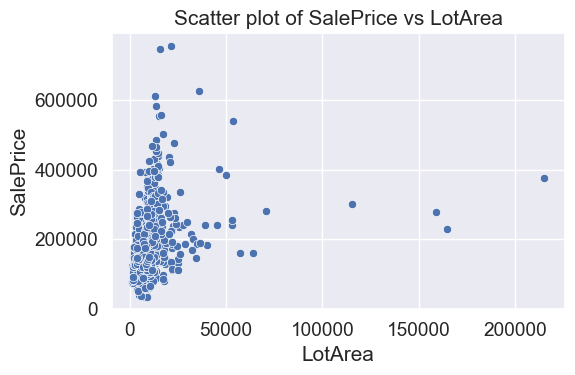

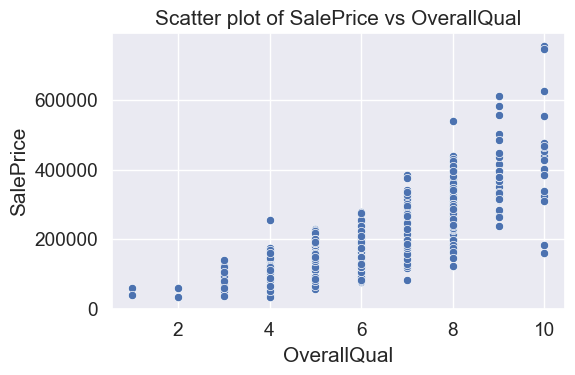

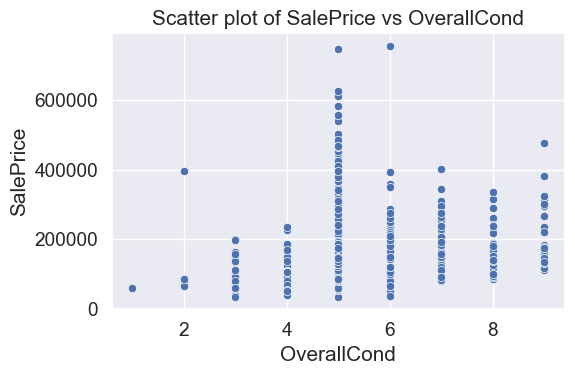

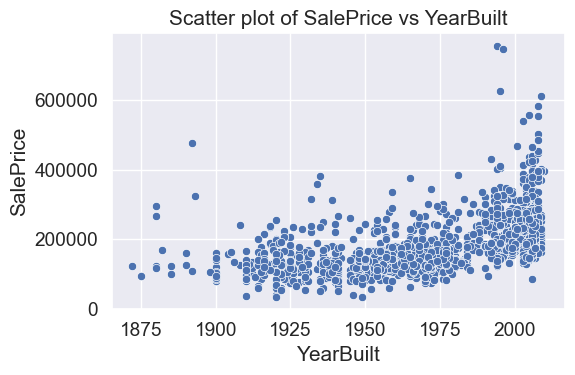

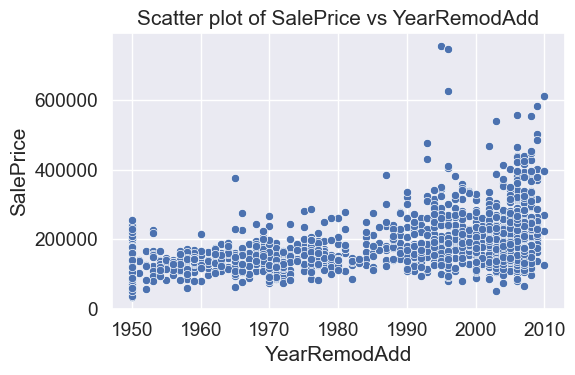

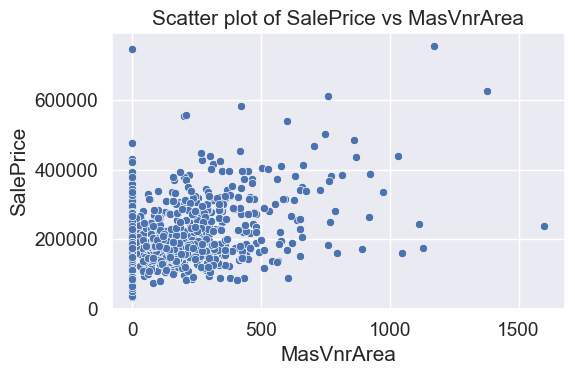

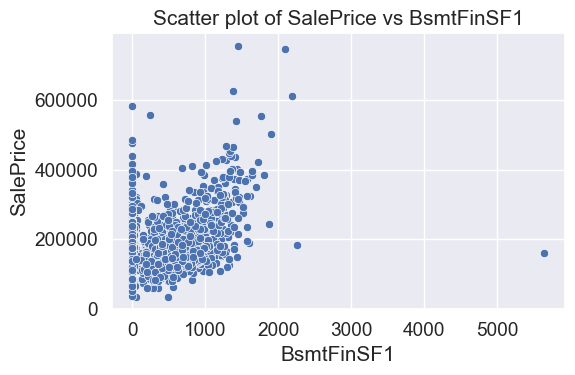

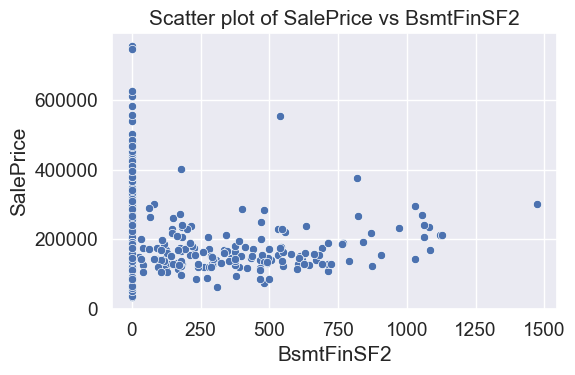

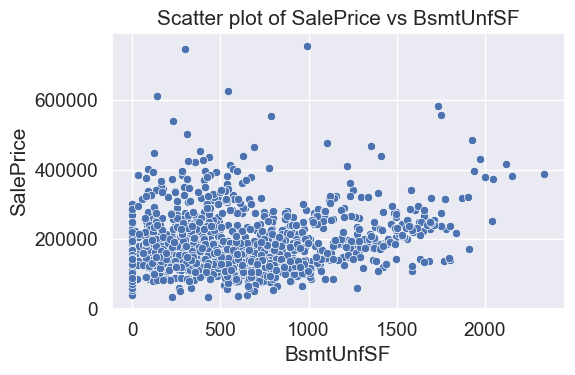

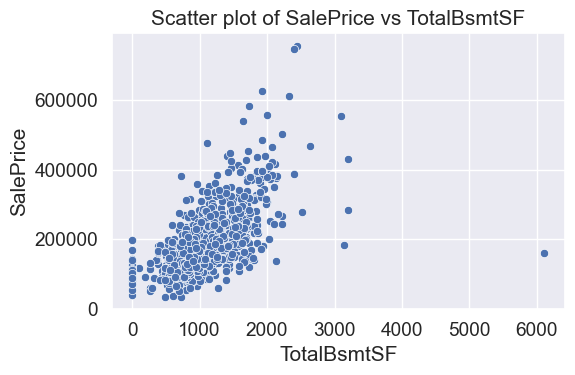

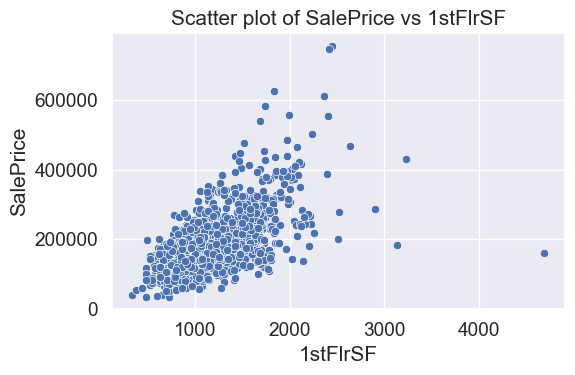

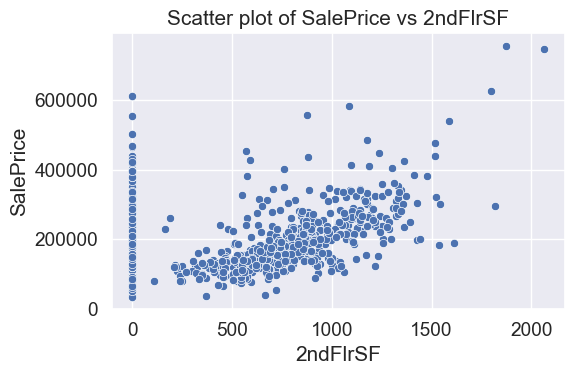

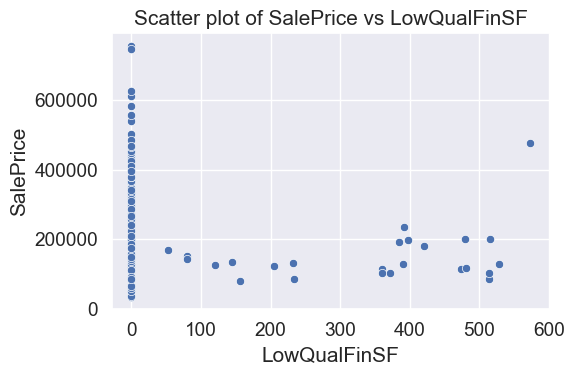

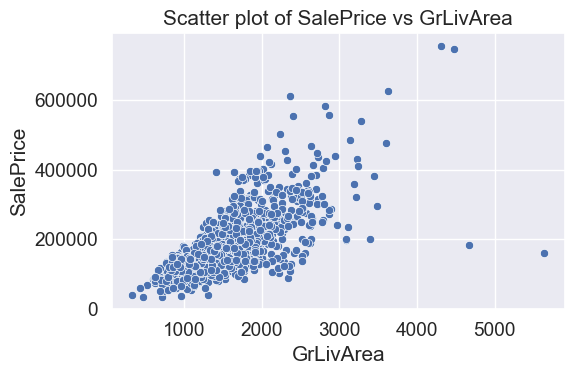

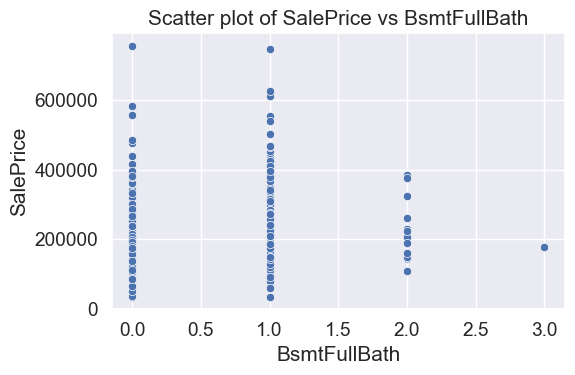

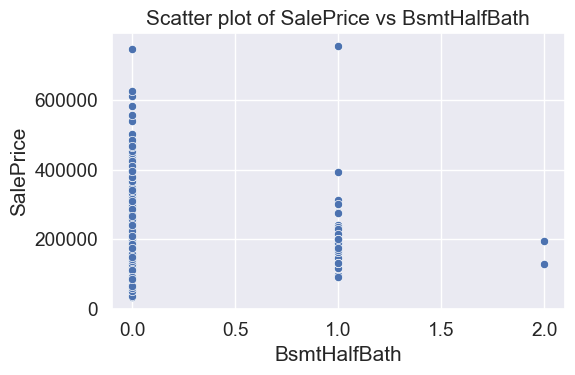

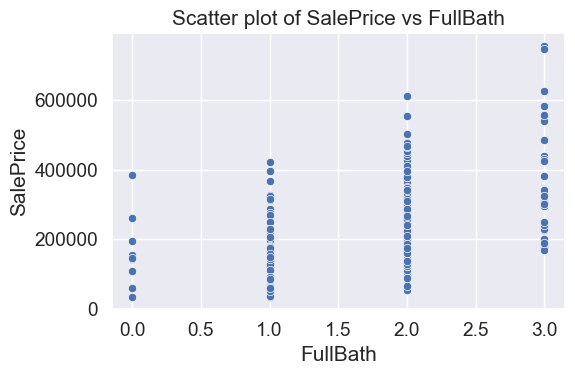

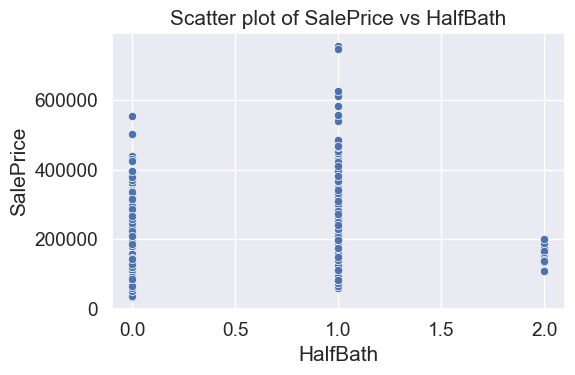

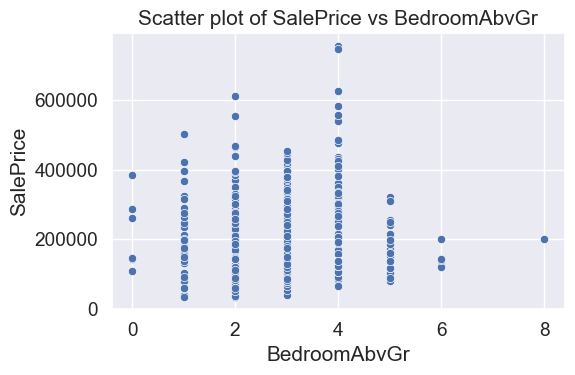

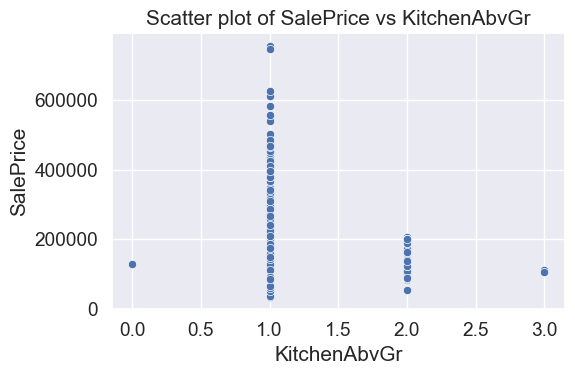

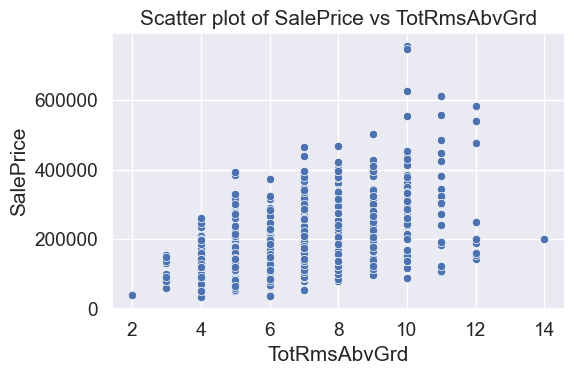

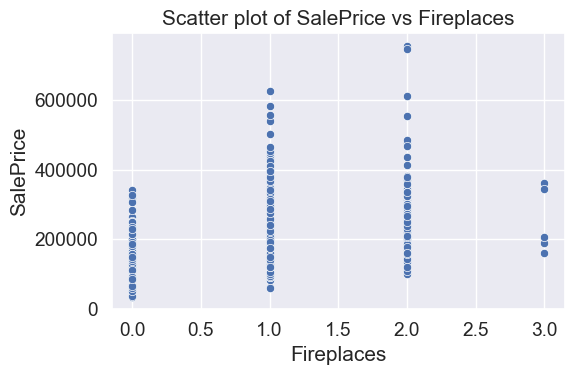

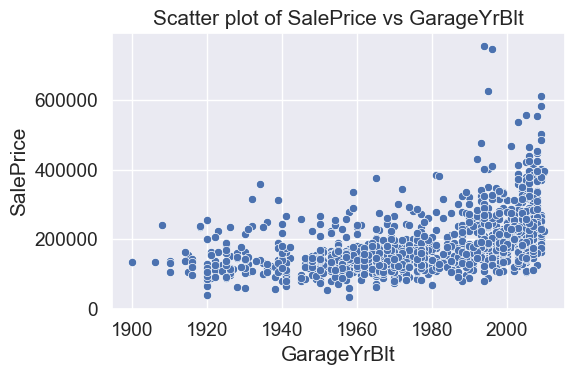

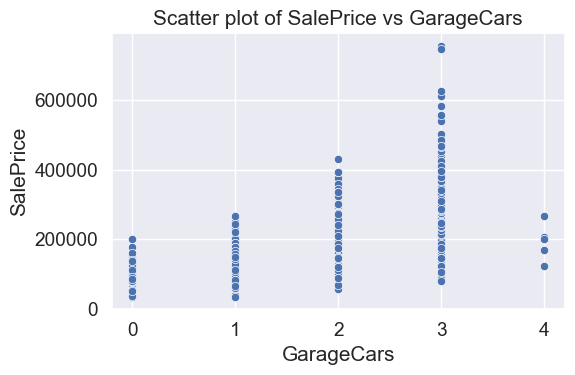

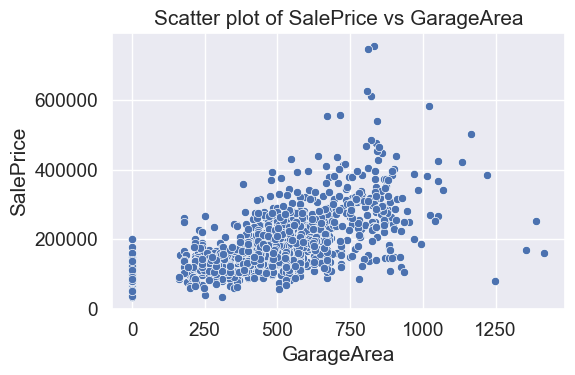

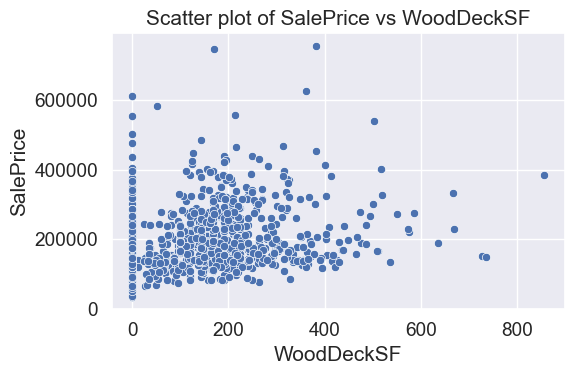

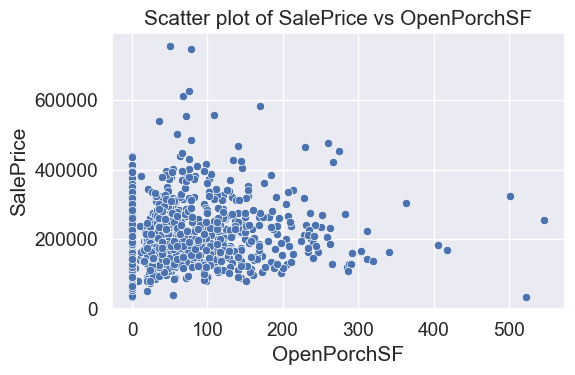

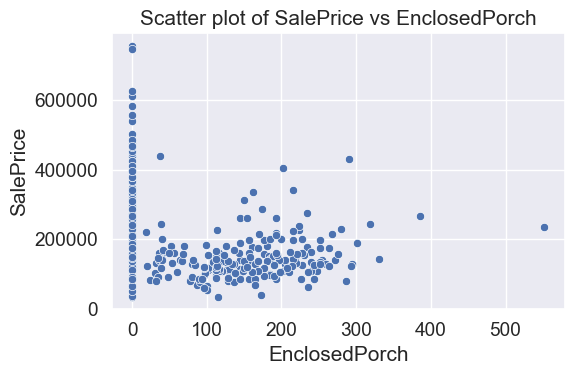

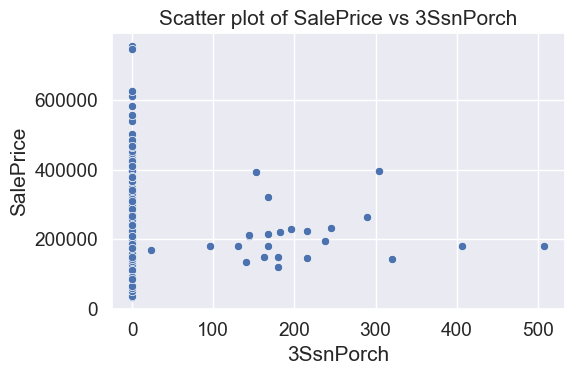

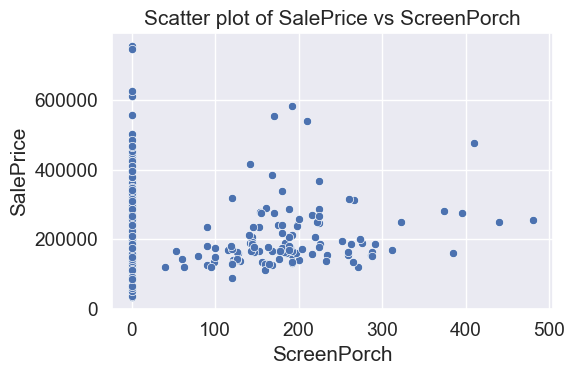

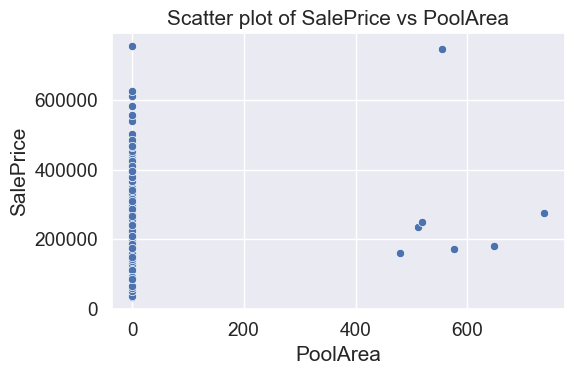

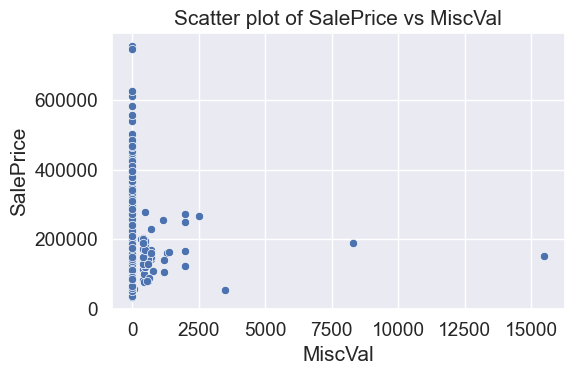

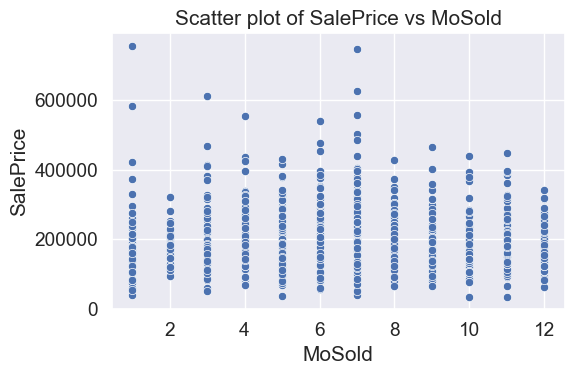

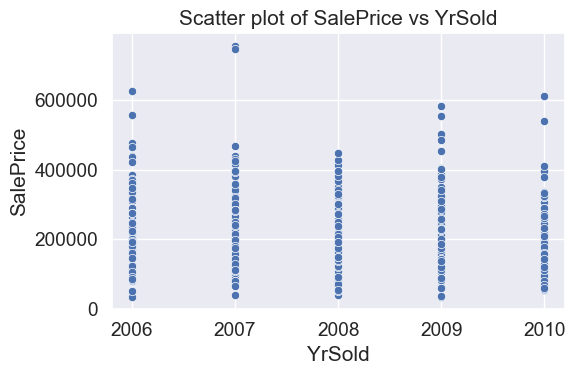

In [489]:
# Make a scatter plot of all numerical variables to see correlation
numerical_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars.remove('SalePrice')  # Exclude target from X

# Create scatter plots for all numerical variables vs SalePrice
for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

#### 3. Convert to numerical all variables that have a grading system and look for correlation

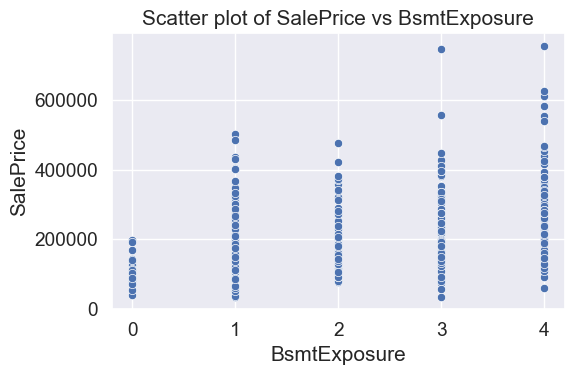

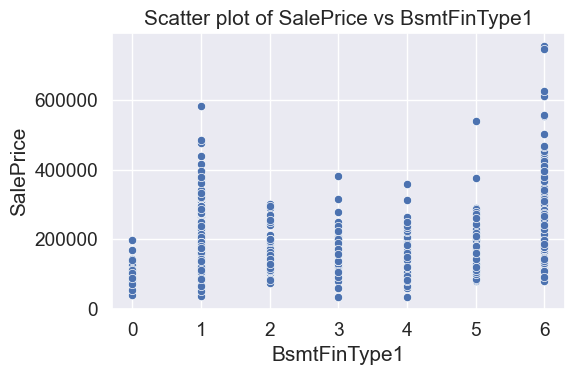

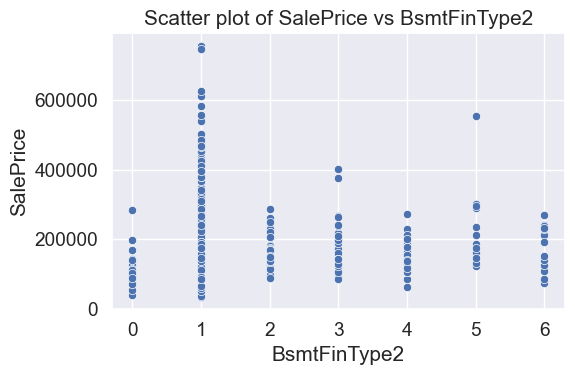

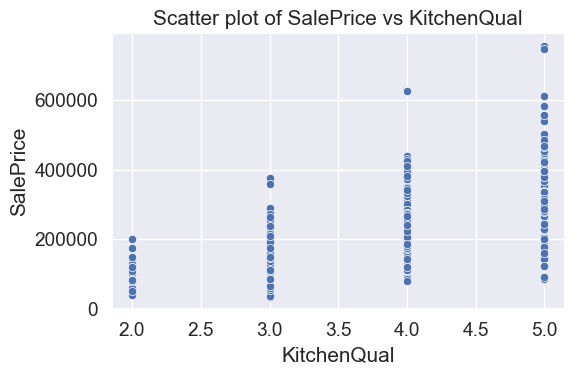

In [ ]:
# OverallQual and OverallCond are already numeric, no mapping needed
df_train['ExterQual'] = df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_train['ExterCond'] = df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_train['BsmtQual'] = df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['BsmtCond'] = df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}).fillna(0)
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_train['GarageQual'] = df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['GarageCond'] = df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_train['HeatingQC'] = df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_train['Functional'] = df_train['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_train['PavedDrive'] = df_train['PavedDrive'].map({'Y':3, 'P':2, 'N':1})

ordinal_vars = [
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual',
    'GarageQual', 'GarageCond', 'HeatingQC', 'Functional', 'PavedDrive'
]

# Create scatter plots for all numerical variables vs SalePrice
for col in ordinal_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

# Applying the same changes to df_test
df_test['ExterQual'] = df_test['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_test['ExterCond'] = df_test['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_test['BsmtQual'] = df_test['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_test['BsmtCond'] = df_test['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}).fillna(0)
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}).fillna(0)
df_test['KitchenQual'] = df_test['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_test['GarageQual'] = df_test['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_test['GarageCond'] = df_test['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}).fillna(0)
df_test['HeatingQC'] = df_test['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_test['Functional'] = df_test['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_test['PavedDrive'] = df_test['PavedDrive'].map({'Y':3, 'P':2, 'N':1})

In [ ]:
# Total SF
df_train['Total_SF'] = df_train['GrLivArea'] + df_train['TotalBsmtSF'] + df_train['GarageArea'] + df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train['TotalBaths'] = df_train['FullBath'] + 0.5 * df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5 * df_train['BsmtHalfBath']
df_train['OverallScore'] = df_train['OverallQual'] * df_train['OverallCond']
df_train['TotalPorchSF'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_train['HasPool'] = (df_train['PoolArea'] > 0).astype(int)
df_train['HasFireplace'] = (df_train['Fireplaces'] > 0).astype(int)
df_train['HasDeck'] = (df_train['WoodDeckSF'] > 0).astype(int)

engineered_vars = [
    'Total_SF', 'TotalBaths', 'OverallScore', 'TotalPorchSF',
    'HasPool', 'HasFireplace', 'HasDeck',
]

# Create scatter plots for all engineered variables vs SalePrice
for col in engineered_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

# Applying the same changes to test
# Total SF
df_test['Total_SF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF'] + df_test['GarageArea'] + df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']
df_test['TotalBaths'] = df_test['FullBath'] + 0.5 * df_test['HalfBath'] + df_test['BsmtFullBath'] + 0.5 * df_test['BsmtHalfBath']
df_test['OverallScore'] = df_test['OverallQual'] * df_test['OverallCond']
df_test['TotalPorchSF'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']
df_test['HasPool'] = (df_test['PoolArea'] > 0).astype(int)
df_test['HasFireplace'] = (df_test['Fireplaces'] > 0).astype(int)
df_test['HasDeck'] = (df_test['WoodDeckSF'] > 0).astype(int)

#### 4. Show scatter plots of all definitively chosen variables

In [ ]:
final_vars_scatter = ['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Total_SF']
final_vars_boxplot = ['MSSubClass', 'OverallQual', 'HeatingQC', 'TotRmsAbvGrd', 'TotalBaths']

all_vars = [(col, 'scatter') for col in final_vars_scatter] + [(col, 'box') for col in final_vars_boxplot]

# Determine number of rows and columns for the grid
n_vars = len(all_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

# Create a big figure
plt.figure(figsize=(6 * n_cols, 4 * n_rows))

# Loop through variables and create plots
for i, (col, plot_type) in enumerate(all_vars, 1):
    plt.subplot(n_rows, n_cols, i)
    if plot_type == 'scatter':
        sns.scatterplot(data=df_train, x=col, y='SalePrice')
    else:
        sns.boxplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### 2. Analyzing `SalePrice`

- Check `df[val].describe()` for bad values.
- Histogram of the variable

In [ ]:
# Variable .describe()
print(df_train['SalePrice'].describe())

# Histogram
plt.figure(figsize=(6, 4))
sns.distplot(df_train['SalePrice'])
plt.tight_layout()
plt.show()

# Skewness and Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [ ]:
# Correlation matrix (only numerical values)
corrmat = df_train.select_dtypes(include=['int64', 'float64']).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Findings**:

- **Intuitively chosen variables**: *TotalBsmtSF*, *GrLivArea*, *GarageArea*, *Total_SF*, *MSSubClass*, *OverallQual*, *HeatingQC*, *TotRmsAbvGrd*, *TotalBaths*
- Not added because seem redundant (higer correlation of another related variable): **ExterQual** and **KitchenQual**, **GarageArea**, **1stFlrSF**, **BsmtQual**, **FullBath**, 
- **MSSubClass**, **HeatingQC**, **TotRmsAbvGrd** are nowhere to be seen.  

**Final variables**: *Total_SF*, *OverallQual*, *GrLivArea*, *GarageCars*, *TotalBaths*, *TotalBsmtSF*, *OverallScore*, *TotRmsAbvGrd*, *YearBuilt*.

In [ ]:
final_chosen = ['Total_SF','OverallQual','GrLivArea','GarageCars','TotalBaths','TotalBsmtSF','OverallScore','TotRmsAbvGrd','YearBuilt']

### 3. Missing data, dropping outliers and standarizing variables

#### 3. 1. Missing data

Look for missing data

In [ ]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
# Dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

# Elimina la columna del test también
df_test = df_test.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)

In [ ]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

In [ ]:
# Standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].values.reshape(-1, 1))
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#### 3. 2. Dropping outliers

In [ ]:
# Create scatter plots for all numerical variables vs  to watch for outliers
for col in final_chosen:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

In [ ]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['Total_SF']>7500) & (df_train['SalePrice']<450000)].index)
df_train = df_train.drop(df_train[(df_train['OverallQual']>9) & (df_train['SalePrice']<200000)].index)
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<400000)].index)
df_train = df_train.drop(df_train[(df_train['Total_SF']>7500) & (df_train['SalePrice']<450000)].index)
df_train = df_train.drop(df_train[df_train['GarageCars']>3].index)
df_train = df_train.drop(df_train[(df_train['TotalBaths']>4) & (df_train['SalePrice']<400000)].index)
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>3000) & (df_train['SalePrice']<500000)].index)
df_train = df_train.drop(df_train[(df_train['Total_SF']>7500) & (df_train['SalePrice']<450000)].index)

In [ ]:
# Revise outliers
for col in final_chosen:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'Scatter plot of SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

#### 3. 3. Standarization

In [ ]:
# Transformación de logaritmo
saleprice = df_train['SalePrice']
df_train['SalePrice'] = np.log(df_train['SalePrice'])
saleprice_log = df_train['SalePrice']
# Crear figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(9, 7.5))
# Histograma original, Q-Q plot original, Histograma log-transformado, Q-Q plot log-transformado
sns.histplot(saleprice, kde=False, stat="density", ax=axes[0,0], color='skyblue'); sns.kdeplot(saleprice, ax=axes[0,0], color='red'); axes[0,0].set_title('Original SalePrice - Histogram')
stats.probplot(saleprice, plot=axes[0,1]); axes[0,1].set_title('Original SalePrice - Q-Q Plot')
sns.histplot(saleprice_log, kde=False, stat="density", ax=axes[1,0], color='skyblue'); sns.kdeplot(saleprice_log, ax=axes[1,0], color='red'); axes[1,0].set_title('Log-transformed SalePrice - Histogram')
stats.probplot(saleprice_log, plot=axes[1,1]); axes[1,1].set_title('Log-transformed SalePrice - Q-Q Plot')
plt.tight_layout()
plt.show()

In [ ]:
# Transformación de logaritmo a todas las variables
for col in final_chosen:
    if col == 'YearBuilt':
        pass
        
    data = df_train[col].copy()
    
    # Evitar problemas con log(0) o negativos
    if (data <= 0).any():
        data_log = data  # no log-transformamos si hay ceros o negativos
        log_label = "(No log, contains ≤0)"
    else:
        df_train[col] = np.log(data)
        data_log = df_train[col]
        log_label = "Log-transformed"
        
    
    # Crear figura 2x2
    fig, axes = plt.subplots(2, 2, figsize=(9, 7.5))
    # Histograma original, Q-Q plot original, Histograma log-transformado, Q-Q plot log-transformado
    sns.histplot(data, kde=False, stat="density", ax=axes[0,0], color='skyblue'); sns.kdeplot(data, ax=axes[0,0], color='red'); axes[0,0].set_title(f'Original {col} - Histogram')
    stats.probplot(data, plot=axes[0,1]); axes[0,1].set_title(f'Original {col} - Q-Q Plot')
    sns.histplot(data_log, kde=False, stat="density", ax=axes[1,0], color='skyblue'); sns.kdeplot(data_log, ax=axes[1,0], color='red'); axes[1,0].set_title(f'{log_label} {col} - Histogram')
    stats.probplot(data_log, plot=axes[1,1]); axes[1,1].set_title(f'{log_label} {col} - Q-Q Plot')
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Crear columna binaria HasBsmt
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
# Guardar datos originales (solo >0)
bsmt_original = df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'].copy()
# Aplicar log solo donde hay sótano
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'])
bsmt_log = df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF']

# Crear figura 2x2 para “antes y después”
fig, axes = plt.subplots(2, 2, figsize=(9, 7.5))
# Histograma original, Q-Q plot original, Histograma log-transformado, Q-Q plot log-transformado
sns.histplot(bsmt_original, kde=False, stat="density", ax=axes[0,0], color='skyblue'); sns.kdeplot(bsmt_original, ax=axes[0,0], color='red'); axes[0,0].set_title('Original TotalBsmtSF - Histogram')
stats.probplot(bsmt_original, plot=axes[0,1]); axes[0,1].set_title('Original TotalBsmtSF - Q-Q Plot')
sns.histplot(bsmt_log, kde=False, stat="density", ax=axes[1,0], color='skyblue'); sns.kdeplot(bsmt_log, ax=axes[1,0], color='red'); axes[1,0].set_title('Log-transformed TotalBsmtSF - Histogram')
stats.probplot(bsmt_log, plot=axes[1,1]); axes[1,1].set_title('Log-transformed TotalBsmtSF - Q-Q Plot')
plt.tight_layout()
plt.show()

# Crear columna binaria HasBsmt
df_test['HasBsmt'] = 0
df_test.loc[df_test['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
# Guardar datos originales (solo >0)
bsmt_original = df_test.loc[df_test['HasBsmt']==1, 'TotalBsmtSF'].copy()
# Aplicar log solo donde hay sótano
df_test.loc[df_test['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_test.loc[df_test['HasBsmt']==1, 'TotalBsmtSF'])
bsmt_log = df_test.loc[df_test['HasBsmt']==1, 'TotalBsmtSF']

### 4. Skweness

In [ ]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_train[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)

In [ ]:
# Same to df_test
numeric_feats = df_test.dtypes[df_test.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_test[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
display(skewness.head(10))
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat in df_test.columns:
        df_test[feat] += 1
        df_test[feat] = boxcox1p(df_test[feat], lam)

### 5. Dummies

In [ ]:
# Drop en df_train
df_train = df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns])

# Drop en df_test
df_test = df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns])
df_train.columns

In [483]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
print(df_train.shape)
df_test = pd.get_dummies(df_test)
print(df_test.shape)
display(df_train)
display(df_test)

(1460, 284)
(1459, 266)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


### 6. Model

In [484]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [485]:
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# y_train: columna objetivo
y_train = df_train['SalePrice']
# X_train: todas las columnas de features
X_train = df_train.drop(['SalePrice'], axis=1)

#Validation function
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf, n_jobs=-1))
    return(rmse)

#### 6. 1. Elastic Net

In [486]:
# Búsqueda de hyperparameters Elastic Net
params = {
    'elasticnet__alpha': np.logspace(-4, 0, 30),  # 30 valores de 1e-4 a 1
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # lista de valores
}

pipeline = make_pipeline(RobustScaler(), ElasticNet(random_state=3))
grid = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 
All the 750 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 980, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\Pablo\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# Final fitting:
final_model_EN = make_pipeline(
    RobustScaler(),
    ElasticNet(alpha=0.00018, l1_ratio=0.3, random_state=3)
)

final_model_EN.fit(X_train, y_train)
score = rmsle_cv(final_model_EN)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#### 6. 2. XGBoost 

In [471]:
# Búsqueda de hyperparameters XGBoost
params = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 2, 5]
}

random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=50,        # 50 combinaciones aleatorias scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=3, n_jobs=-1)              # usar todos los cores
random_search.fit(X_train, y_train)
print(random_search.best_params_)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Xgboost score: 0.0231 (0.0013)



In [472]:
# Final fitting:
final_model_XGB = xgb.XGBRegressor(
    colsample_bytree=0.5,
    gamma=0,
    learning_rate=0.03,
    max_depth=3,
    n_estimators=4,
    reg_alpha=0.1,
    reg_lambda=2,
    subsample=0.8,
    random_state=7,
    nthread=-1
)

final_model_XGB.fit(X_train, y_train)
score = rmsle_cv(final_model_XGB)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0393 (0.0015)



### 7. Submission

In [473]:
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            scoring=scoring, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label="Train RMSE")
    plt.plot(train_sizes, test_rmse.mean(axis=1), 'o-', label="CV RMSE")
    plt.fill_between(train_sizes, test_rmse.mean(axis=1)-test_rmse.std(axis=1),
                     test_rmse.mean(axis=1)+test_rmse.std(axis=1), alpha=0.1)
    plt.xlabel("Número de muestras de entrenamiento")
    plt.ylabel("RMSE (log-scale)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

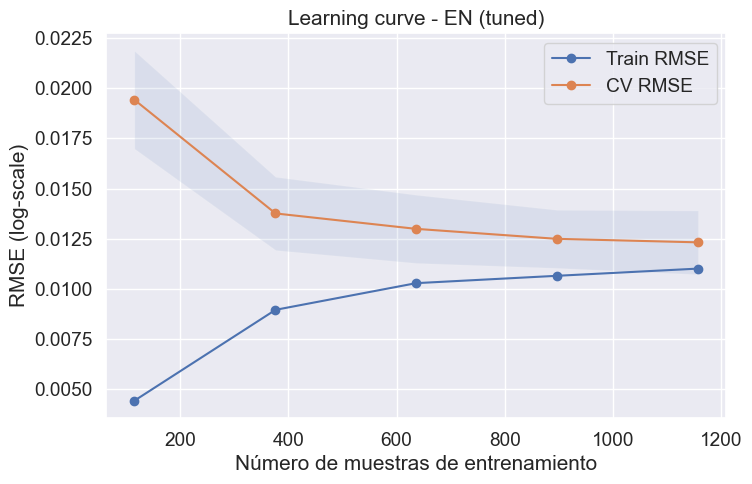

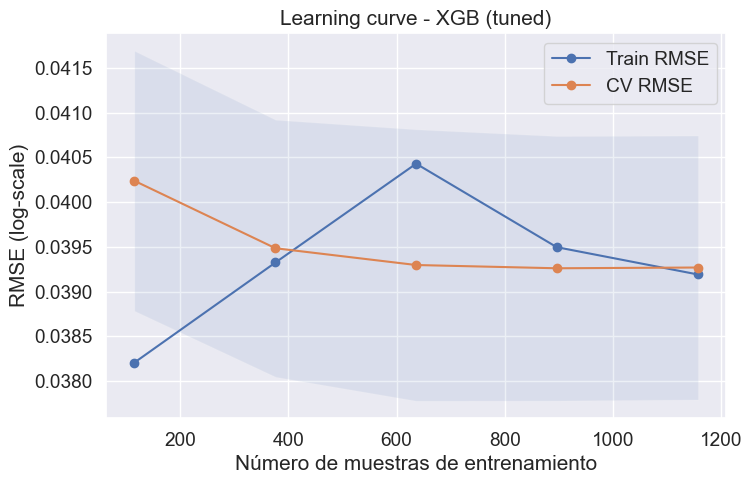

In [474]:
plot_learning_curve(final_model_EN, X_train, y_train, title="Learning curve - EN (tuned)", cv=KFold(n_splits=5, shuffle=True, random_state=42))
plot_learning_curve(final_model_XGB, X_train, y_train, title="Learning curve - XGB (tuned)", cv=KFold(n_splits=5, shuffle=True, random_state=42))


Top 30 features por importancia (XGB):
ExterQual                0.262319
OverallQual              0.133976
Total_SF                 0.116775
TotalBaths               0.043244
CentralAir_N             0.042022
KitchenQual              0.034016
HasFireplace             0.029852
GarageCars               0.029806
GrLivArea                0.028215
OverallScore             0.021237
BsmtQual                 0.021100
MSZoning_RM              0.015851
KitchenAbvGr             0.014500
GarageCond               0.013813
BldgType_Duplex          0.011182
MSZoning_RL              0.011158
YearBuilt                0.008948
YearRemodAdd             0.008468
Fireplaces               0.008212
BsmtFinSF1               0.007538
GarageQual               0.006993
TotalBsmtSF              0.006540
1stFlrSF                 0.005593
GarageArea               0.005461
Neighborhood_OldTown     0.005295
FullBath                 0.004737
BsmtFinType1             0.004438
LotArea                  0.004419
MSZoning

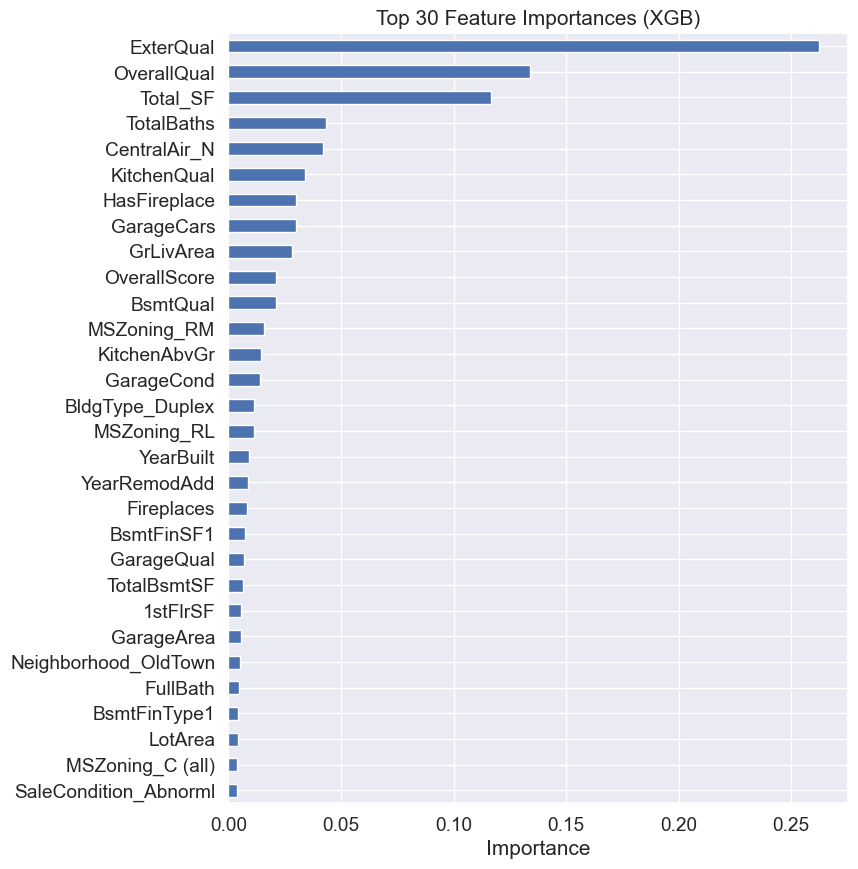

In [384]:
fi = pd.Series(final_model_XGB.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 30 features por importancia (XGB):")
print(fi.head(30))

plt.figure(figsize=(8,10))
fi.head(30).sort_values().plot(kind='barh')
plt.title("Top 30 Feature Importances (XGB)")
plt.xlabel("Importance")
plt.show()

In [391]:
# Asegurarse que df_test tenga las mismas columnas que X_train
df_test_aligned = df_test.reindex(columns=X_train.columns, fill_value=0)

# Predicción
y_pred_enet = final_model_EN.predict(df_test_aligned)
y_pred_xgb = final_model_XGB.predict(df_test_aligned)

# Deshacer log1p
y_pred_enet = np.exp(y_pred_enet)  # exp(y) - 1
y_pred_xgb = np.exp(y_pred_xgb)

sub = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': y_pred_enet
})

# ✅ Guardar en CSV sin índice
sub.to_csv('submission.csv', index=False)

print("✅ Archivo 'submission.csv' creado con éxito!")
print(sub.head())

✅ Archivo 'submission.csv' creado con éxito!
     Id     SalePrice
0  1461  3.467732e+15
1  1462  4.727091e+15
2  1463  5.883156e+15
3  1464  6.001391e+15
4  1465  5.376564e+15


## A study on Regression applied to the Ames dataset (summary)

- By: [Julien Cohen-Solal](http://pmarcelino.com) - 2017
- Kaggle Code: [here](https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- **About**: feature engineering, linear regression, but easy to beginners

## Regularized Linear Models (summary)

- By: [Alexandru Papiu](http://apapiu.github.io/) - 2022
- Kaggle Code: [here](https://www.kaggle.com/code/apapiu/regularized-linear-models)
- **About**: starter kernel on modelling and cross validation

## Stacked Regressions: Top 4% on LeaderBoard (summary)

- By: [Serigne](http://apapiu.github.io/) - July 2017
- Kaggle Code: [here](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard)
- **About**: summary of previous 3.

## XGBoost + Lasso (summary)

- By: [Human Analog](https://www.kaggle.com/code/humananalog/xgboost-lasso) - 2017
- Kaggle Code: [here](https://www.kaggle.com/code/humananalog/xgboost-lasso)
- **About**: feature engineering, XGBoost and Lasso